In [27]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"indrast19","key":"d1b80b1f8adbcad673036a22fde4c157"}'}

In [28]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [29]:
!kaggle datasets download -d shihouinyoruichi/valorant-champions-2022-istanbul-stats --force

  0% 0.00/1.35k [00:00<?, ?B/s]
100% 1.35k/1.35k [00:00<00:00, 1.96MB/s]


In [30]:
!mkdir -p shihouinyoruichi/valorant-champions-2022-istanbul-stats
!unzip valorant-champions-2022-istanbul-stats.zip -d shihouinyoruichi/valorant-champions-2022-istanbul-stats
!ls shihouinyoruichi/valorant-champions-2022-istanbul-stats

Archive:  valorant-champions-2022-istanbul-stats.zip
replace shihouinyoruichi/valorant-champions-2022-istanbul-stats/valorant champions istanbul.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 'valorant champions istanbul.csv'


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [32]:
df = pd.read_csv('/content/shihouinyoruichi/valorant-champions-2022-istanbul-stats/valorant champions istanbul.csv')

In [33]:
df.head()

,Player,Team,Nationality,Kill,Death,K/D,KAST,Prize,Role,HS %,Rounds Played,Rounds Win,Rounds Lose,Rank
0,Sacy,LOUD,Brazil,147,123,1.20,76%,"\t$60,000.00",Initiator,25.50,222,155,67,1
1,saadhak,LOUD,Argentina,150,143,1.05,76%,"\t$60,000.00",Initiator,22.50,222,155,67,1
2,pANcada,LOUD,Brazil,169,137,1.23,81%,"\t$60,000.00",Controller,36.75,222,155,67,1
3,Less,LOUD,Brazil,176,134,1.31,73%,"\t$60,000.00",Sentinel,26.50,222,155,67,1
4,aspas,LOUD,Brazil,166,158,1.05,71%,"\t$60,000.00",Duelist,26.25,222,155,67,1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         40 non-null     object 
 1   Team           40 non-null     object 
 2   Nationality    40 non-null     object 
 3   Kill           40 non-null     int64  
 4   Death          40 non-null     int64  
 5   K/D            40 non-null     float64
 6   KAST           40 non-null     object 
 7   Prize          40 non-null     object 
 8   Role           40 non-null     object 
 9   HS %           40 non-null     float64
 10  Rounds Played  40 non-null     int64  
 11  Rounds Win     40 non-null     int64  
 12  Rounds Lose    40 non-null     int64  
 13  Rank           40 non-null     object 
dtypes: float64(2), int64(5), object(7)
memory usage: 4.5+ KB


<Axes: >

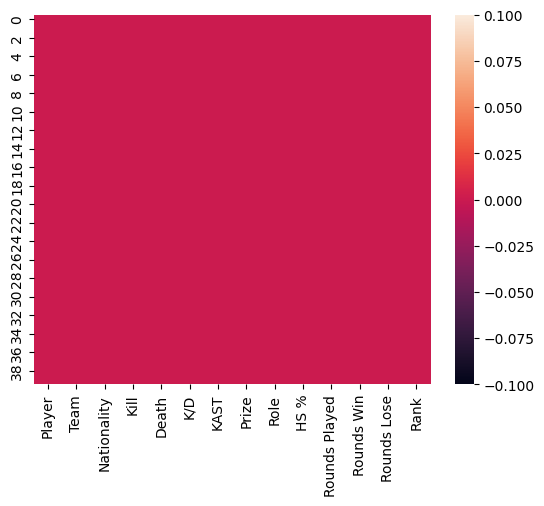

In [35]:
sns.heatmap(df.isnull())

In [36]:
df.describe()

,Kill,Death,K/D,HS %,Rounds Played,Rounds Win,Rounds Lose
count,40.00000,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000
mean,139.90000,139.375000,1.002500,27.223000,202.25000,103.250000,99.000000
std,68.09827,63.050524,0.217028,5.515632,94.68673,51.542241,50.102459
min,39.00000,54.000000,0.590000,15.000000,81.00000,35.000000,39.000000
25%,84.25000,82.250000,0.855000,23.750000,136.00000,63.750000,63.500000
50%,141.00000,129.500000,0.960000,26.800000,198.50000,98.500000,84.500000
75%,180.50000,175.250000,1.110000,30.447500,244.75000,147.500000,126.000000
max,334.00000,254.000000,1.520000,38.800000,365.00000,181.000000,184.000000


<Axes: >

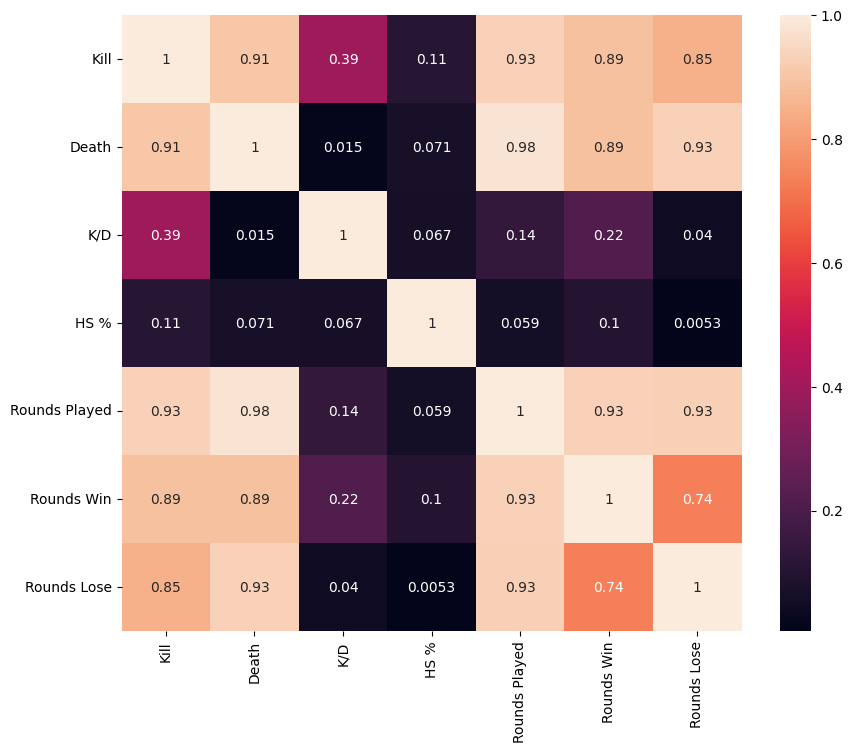

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [38]:
features = [ 'Kill', 'Death', 'Rounds Win', 'Rounds Lose', 'K/D', 'HS %']
x = df[features]
y = df['Rounds Played']
x.shape, y.shape

((40, 6), (40,))

In [39]:
x_train, X_test, y_train, y_test = train_test_split(x, y, random_state=70)
y_test.shape

(10,)

In [40]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [41]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  1.0


In [42]:
input_data =np.array([[188,89,160,72,1.40,30.30]])
prediction=lr.predict(input_data)
print('Estimasi Rounds Played : ',prediction)

Estimasi Rounds Played :  [232.]


In [43]:
from sklearn.metrics import precision_recall_curve, f1_score
threshold = 0.5

y_pred_binary = (pred > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)

f1 = f1_score(y_test_binary, y_pred_binary)
print('F1 Score:', f1)

F1 Score: 1.0


In [44]:
import pickle

filename = 'estimasi_Round_Played.sav'
pickle.dump(lr,open(filename,'wb'))